Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
    
[Link](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation)

In [147]:
# imports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [148]:
# load data
col_names=["price", "maintenance", "doors", "persons", "size of boot", "safety", "class"]
cars = pd.read_csv("../data/car_dataset/car.data",
                   names=col_names,
                   header=None,
                   engine="python")
cars.head()

,price,maintenance,doors,persons,size of boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [149]:
# check for missing data
null_columns = cars.columns[cars.isnull().any()]
cars[null_columns].isnull().sum()

Series([], dtype: float64)

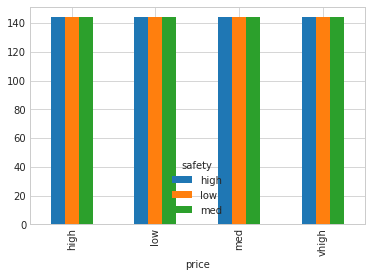

In [150]:
# compare price and safety
df = cars.groupby(["price", "safety"]).size()
df = df.unstack()
df.plot(kind="bar");

In [151]:
cars["doors"].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [152]:
# replace string values with numeric values
cars["doors"] = cars["doors"].astype("str")
cars["doors"].replace(["2", "3", "4", "5more"], [2, 3, 4, 5], inplace=True)
cars["doors"]

0       2
1       2
2       2
3       2
4       2
       ..
1723    5
1724    5
1725    5
1726    5
1727    5
Name: doors, Length: 1728, dtype: int64

In [153]:
cars["persons"].unique()

array(['2', '4', 'more'], dtype=object)

In [154]:
# replace string values with numeric values
cars["persons"] = cars["persons"].astype("str")
cars["persons"].replace(["2", "4", "more"], [2, 4, 5], inplace=True)
cars["persons"]

0       2
1       2
2       2
3       2
4       2
       ..
1723    5
1724    5
1725    5
1726    5
1727    5
Name: persons, Length: 1728, dtype: int64

In [155]:
cars["price"].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [156]:
# replace string values
cars.price = cars.price.astype("str")
cars.price.replace(["vhigh", "high", "med", "low"], [4, 3, 2, 1], inplace=True)
cars.price

0       4
1       4
2       4
3       4
4       4
       ..
1723    1
1724    1
1725    1
1726    1
1727    1
Name: price, Length: 1728, dtype: int64

In [157]:
cars.maintenance.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [158]:
# replace string values
cars.maintenance = cars.maintenance.astype("str")
cars.maintenance.replace(["vhigh", "high", "med", "low"], [4, 3, 2, 1], inplace=True)
cars.maintenance

0       4
1       4
2       4
3       4
4       4
       ..
1723    1
1724    1
1725    1
1726    1
1727    1
Name: maintenance, Length: 1728, dtype: int64

In [159]:
cars

,price,maintenance,doors,persons,size of boot,safety,class
0,4,4,2,2,small,low,unacc
1,4,4,2,2,small,med,unacc
2,4,4,2,2,small,high,unacc
3,4,4,2,2,med,low,unacc
4,4,4,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,1,1,5,5,med,med,good
1724,1,1,5,5,med,high,vgood
1725,1,1,5,5,big,low,unacc
1726,1,1,5,5,big,med,good


In [160]:
cars["size of boot"].unique()

array(['small', 'med', 'big'], dtype=object)

In [161]:
# replace string values
cars["size of boot"] = cars["size of boot"].map({"small": 0, "med": 1, "big": 3})
cars["size of boot"]

0       0
1       0
2       0
3       1
4       1
       ..
1723    1
1724    1
1725    3
1726    3
1727    3
Name: size of boot, Length: 1728, dtype: int64

In [162]:
cars.safety.unique()

array(['low', 'med', 'high'], dtype=object)

In [163]:
# replace string values
cars.safety = cars.safety.map({"low": 1, "med": 2, "high": 3})
cars.safety

0       1
1       2
2       3
3       1
4       2
       ..
1723    2
1724    3
1725    1
1726    2
1727    3
Name: safety, Length: 1728, dtype: int64

In [164]:
cars.head()

,price,maintenance,doors,persons,size of boot,safety,class
0,4,4,2,2,0,1,unacc
1,4,4,2,2,0,2,unacc
2,4,4,2,2,0,3,unacc
3,4,4,2,2,1,1,unacc
4,4,4,2,2,1,2,unacc


## Plotting data

In [165]:
# style
plt.style.use("seaborn-whitegrid")

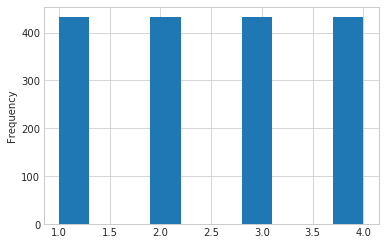

In [166]:
cars["price"].plot.hist();

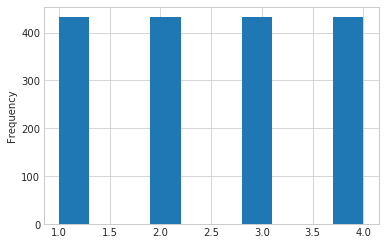

In [167]:
cars.maintenance.plot.hist();

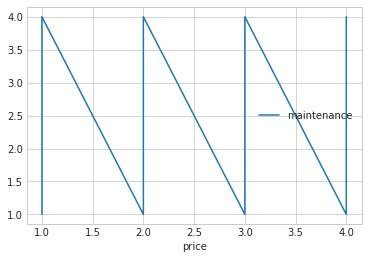

In [168]:
cars.plot(x="price", y="maintenance");

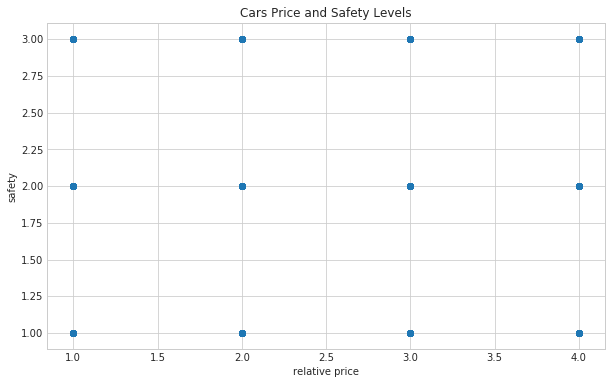

In [169]:
fig, ax = plt.subplots(figsize=(10,6))

scatter = ax.scatter(cars.price,
                     cars.safety,
                     cmap="winter")
ax.set(title="Cars Price and Safety Levels",
       xlabel="relative price",
       ylabel="safety");